In [21]:
import os 
import numpy as np 
import pandas as pd
from scipy import stats

In [22]:
usd_ngn = pd.read_csv('usd_ngn.csv')

In [23]:
usd_ngn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2870 non-null   object
 1   Price     2870 non-null   object
 2   Open      2870 non-null   object
 3   High      2870 non-null   object
 4   Low       2870 non-null   object
 5   Vol.      652 non-null    object
 6   Change %  2870 non-null   object
dtypes: object(7)
memory usage: 157.1+ KB


In [24]:
usd_ngn.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2024,"1,538.570","1,549.000","1,552.500","1,538.570",NaN,0.00%
1,12/29/2024,"1,538.570","1,549.000","1,549.000","1,538.570",NaN,-0.03%
2,12/27/2024,"1,539.000","1,538.570","1,559.500","1,532.285",NaN,0.09%
3,12/26/2024,"1,537.570","1,538.570","1,538.570","1,538.570",NaN,0.12%
4,12/25/2024,"1,535.720","1,535.720","1,535.720","1,535.720",NaN,-0.15%


In [25]:
# types of variables
usd_ngn.Date = pd.to_datetime(usd_ngn.Date)
usd_ngn.Price = pd.to_numeric(usd_ngn.Price.str.replace(',', ''), errors='coerce')
usd_ngn.Open = pd.to_numeric(usd_ngn.Open.str.replace(',', ''), errors='coerce')
usd_ngn.High = pd.to_numeric(usd_ngn.High.str.replace(',', ''), errors='coerce')
usd_ngn.Low = pd.to_numeric(usd_ngn.Low.str.replace(',', ''), errors='coerce')
usd_ngn["Change %"] = pd.to_numeric(usd_ngn["Change %"].str.replace('%', ''), errors='coerce')

In [26]:
usd_ngn.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-30,1538.57,1549.00,1552.50,1538.570,NaN,0.00
1,2024-12-29,1538.57,1549.00,1549.00,1538.570,NaN,-0.03
2,2024-12-27,1539.00,1538.57,1559.50,1532.285,NaN,0.09
3,2024-12-26,1537.57,1538.57,1538.57,1538.570,NaN,0.12
4,2024-12-25,1535.72,1535.72,1535.72,1535.720,NaN,-0.15


<Axes: title={'center': 'USD/NGN Exchange Rate'}, xlabel='Date'>

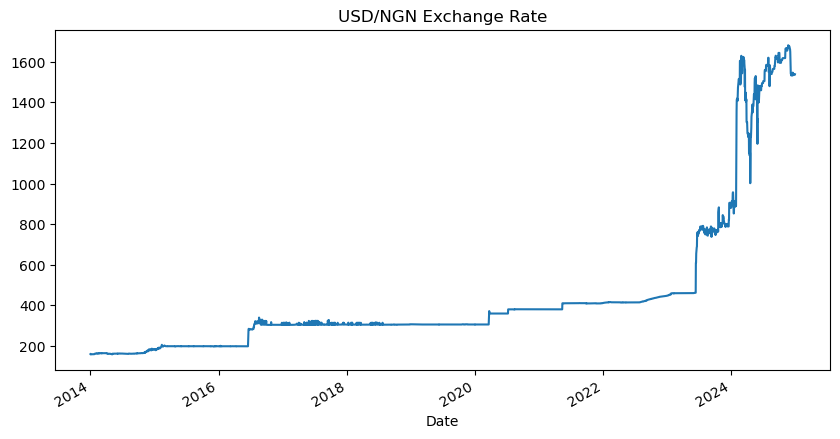

In [27]:
usd_ngn.sort_values('Date').set_index('Date').Price.plot(kind='line', title='USD/NGN Exchange Rate', figsize=(10, 5))

<Axes: title={'center': 'USD/NGN Exchange Rate'}, xlabel='Date'>

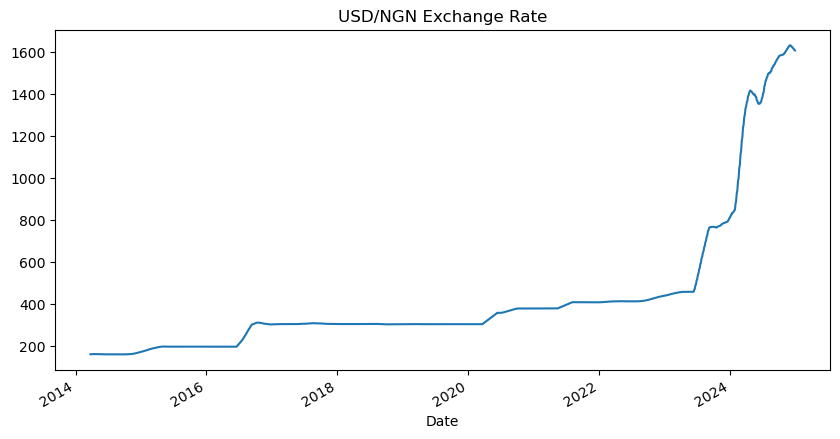

In [30]:
n_days = 60
usd_ngn.sort_values("Date").set_index("Date")['Price'].rolling(window=n_days).mean().plot(kind='line', title='USD/NGN Exchange Rate', figsize=(10, 5))

In [43]:
usd_ngn.head(30).describe()

,Date,Price,Open,High,Low,Change %
count,30,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2024-12-10 05:36:00,1587.316667,1601.223000,1619.747500,1576.211000,-0.262667
min,2024-11-20 00:00:00,1532.270000,1533.270000,1535.720000,1485.000000,-3.310000
25%,2024-11-29 18:00:00,1538.070000,1547.462500,1553.237500,1533.135000,-0.452500
50%,2024-12-10 12:00:00,1541.965000,1556.100000,1599.822500,1538.000000,-0.015000
75%,2024-12-19 18:00:00,1667.032500,1680.475000,1692.567500,1641.875000,0.112500
max,2024-12-30 00:00:00,1681.390000,1693.360000,1717.500000,1679.125000,0.950000
std,NaN,62.742189,65.718608,71.299209,61.683962,0.798749
